In [4]:
print("zero and zero")


zero and zero


In [5]:
import numpy as np

In [6]:
from numpy import array


This line of code is generating an array of 1000 random integers between 0 and 79 (inclusive) using NumPy's `random.randint` function. The syntax is `np.random.randint(low, high, size)`, where `low` is the lowest integer to be drawn from the distribution, `high` is one above the highest integer to be drawn, and `size` is the number of random integers to generate.
populations = np.random.randint(0, 80, 1000)
print(populations)

SyntaxError: unterminated string literal (detected at line 4) (3130849351.py, line 4)

In [ ]:
from random import sample


np.random.seed(115)
sample=np.random.choice(a=populations, size=100)  # noqa: F811
sample


array([ 0, 42, 52, 32, 65,  9,  4, 30, 20, 34, 20, 44, 51, 12, 31, 75, 42,
       79,  4, 61, 11, 21, 40, 11, 35, 75, 68, 11, 62, 49, 22, 13,  1,  0,
       23, 20, 20, 31, 50, 75, 42, 62, 67, 36, 41, 68,  1, 29, 29, 15, 34,
       61, 17,  0, 19, 63, 42, 13, 64, 28, 51, 43, 24, 36, 46, 75, 65, 15,
       74, 72, 34, 28, 59, 75, 29,  0, 42, 63, 63, 33, 62, 40, 28, 68, 30,
       65, 28, 75, 66, 53, 68, 32, 18, 22, 19, 67, 11, 66, 16, 20],
      dtype=int32)

In [ ]:
sample.mean() # type: ignore


np.float64(38.57)

In [ ]:
populations.mean()  

np.float64(39.23)

In [ ]:
sample2 = sample[:10] # type: ignore



In [ ]:
sample2.mean()

np.float64(28.8)

In [ ]:
import seaborn as sns   
tips=sns.load_dataset('tips')  
tips.head() 
#tips.info()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df=tips.copy()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
%pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import researchpy as rp
rp.summary_cont(df[['total_bill','tip','size']])


c:\Users\peqas\AppData\Local\Programs\Python\Python313\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'total_bill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
c:\Users\peqas\AppData\Local\Programs\Python\Python313\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'tip' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
c:\Users\peqas\AppData\Local\Programs\Python\Python313\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'size' has dtype incompatible with float64, please explicitly cast to

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats


tips = sns.load_dataset('tips')

def descriptive_stats(data, column):
    mean = data[column].mean()
    std = data[column].std()
    se = std / (len(data) ** 0.5)
    conf_int = stats.norm.interval(0.95, loc=mean, scale=se)
    return mean, std, se, conf_int


columns = ['total_bill', 'tip', 'size']
results = []

for col in columns:
    mean, std, se, conf_int = descriptive_stats(tips, col)
    results.append([col, len(tips), mean, std, se, conf_int[0], conf_int[1]])


df_results = pd.DataFrame(results, columns=['Variable', 'N', 'Mean', 'SD', 'SE', '95% Conf. Lower', '95% Conf. Upper'])
print(df_results)

     Variable    N       Mean        SD        SE  95% Conf. Lower  \
0  total_bill  244  19.785943  8.902412  0.569919        18.668923   
1         tip  244   2.998279  1.383638  0.088578         2.824668   
2        size  244   2.569672  0.951100  0.060888         2.450334   

   95% Conf. Upper  
0        20.902962  
1         3.171889  
2         2.689010  


In [ ]:
rp.summary_cat(df[['sex','smoker','day','time']])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79
8,time,Dinner,176,72.13
9,,Lunch,68,27.87


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns   
import sklearn  # noqa: F401


In [ ]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.to_csv('titanic.csv', index=False)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
df=pd.read_csv('titanic.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='age'>

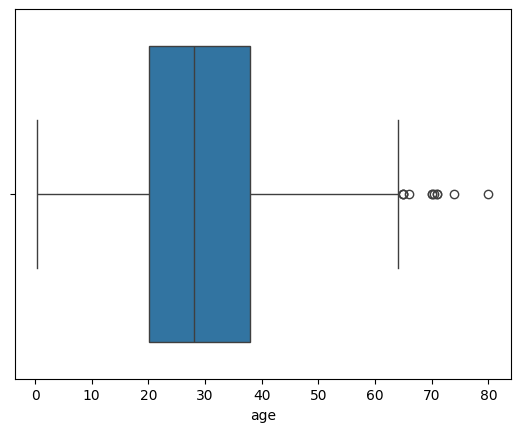

In [ ]:
sns.boxplot(x=df['age'])

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound)
print(upper_bound)      


-6.6875
64.8125


In [ ]:
df[(df['age']<lower_bound) | (df['age']>upper_bound)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [ ]:
df[(df['age']<lower_bound) | (df['age']>upper_bound)].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [ ]:
df[(df['age']<lower_bound) | (df['age']>upper_bound)].any(axis=None)

np.True_

In [ ]:
df[(df['age']<lower_bound)].any(axis=None)

np.False_

In [ ]:
df [(df['age']>upper_bound)].any(axis=None)

np.True_

In [ ]:
import matplotlib.pyplot as plt  # noqa: F811

def outlier_thresholds (dataframe, col_name, q1=0.25, q3=0.75):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquartile_range=quartile3-quartile1
    up_limit=quartile3+1.5*interquartile_range
    low_limit=quartile1-1.5*interquartile_range
    return low_limit, up_limit    
    

In [ ]:
#outlier_thresholds(df,"age")

outlier_thresholds(df,"fare")


(np.float64(-26.724), np.float64(65.6344))

In [ ]:
from seaborn import load_dataset
titanic = load_dataset("titanic")
titanic.head()  # Show the first 5 rows of the DataFrame
titanic.info()  # Show information about the DataF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
from collections import Counter

def find_mode(numbers):
    # Counter ilə hər bir elementin neçə dəfə təkrarlandığını hesablayırıq
    count = Counter(numbers)
    
    # Ən çox təkrarlanan elementin sayını tapırıq
    max_count = max(count.values())
    
    # Ən çox təkrarlanan elementləri tapırıq (birdən çox ola bilər)
    mode = [num for num, freq in count.items() if freq == max_count]
    
    return mode

# Nümunə siyahı
numbers = [1, 2, 2, 2,2, 3, 4, 4, 4,4,5]

# Modu tapmaq
mode = find_mode(numbers)
print("Mod:", mode)

Mod: [2, 4]


In [ ]:
import numpy as np 
olcumler_=np.array([100,214,203,404,55,156,2077,89,169,105,150,197,250,2450,145]) 
olcumler_[0:10]

array([ 100,  214,  203,  404,   55,  156, 2077,   89,  169,  105])

In [ ]:
stats.describe(olcumler_)

DescribeResult(nobs=15, minmax=(np.int64(55), np.int64(2450)), mean=np.float64(450.93333333333334), variance=np.float64(553302.780952381), skewness=np.float64(2.144410979973146), kurtosis=np.float64(2.7686375774944345))

In [ ]:
import pandas as pd 

<Axes: ylabel='Frequency'>

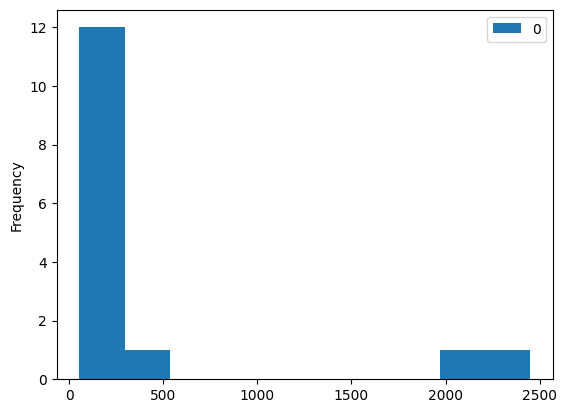

In [ ]:
pd.DataFrame(olcumler_).plot.hist()

In [ ]:
import pylab


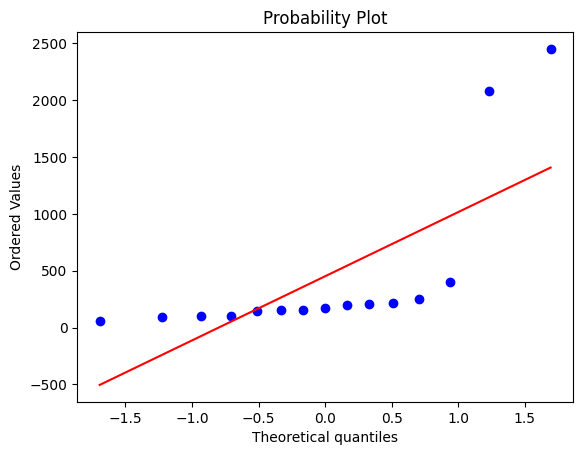

In [ ]:
stats.probplot(olcumler_, dist="norm", plot=pylab)
pylab.show()

In [ ]:
from scipy.stats   import shapiro   

In [ ]:
shapiro(olcumler_)

ShapiroResult(statistic=np.float64(0.5215322444999633), pvalue=np.float64(5.274816488033486e-06))

In [ ]:
stats.ttest_1samp(olcumler_, popmean=170)

TtestResult(statistic=np.float64(1.4627411366831935), pvalue=np.float64(0.16562390100179392), df=np.int64(14))

In [ ]:
import pandas as pd 
data = pd.read_csv("mtcars.csv")
data

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
model = data["model"]
mpg=    data["mpg"]
A =    data["cyl"]
B =   data["disp"]
C =     data["hp"]
drat=   data["drat"]
wt=     data["wt"]
qsec=   data["qsec"]        
vs=     data["vs"]
am=     data["am"]        
gear=   data["gear"]        
carb=   data["carb"]    

In [ ]:
dfs=[A,B,C] 

In [ ]:
dfs

[0     6
 1     6
 2     4
 3     6
 4     8
 5     6
 6     8
 7     4
 8     4
 9     6
 10    6
 11    8
 12    8
 13    8
 14    8
 15    8
 16    8
 17    4
 18    4
 19    4
 20    4
 21    8
 22    8
 23    8
 24    8
 25    4
 26    4
 27    4
 28    8
 29    6
 30    8
 31    4
 Name: cyl, dtype: int64,
 0     160.0
 1     160.0
 2     108.0
 3     258.0
 4     360.0
 5     225.0
 6     360.0
 7     146.7
 8     140.8
 9     167.6
 10    167.6
 11    275.8
 12    275.8
 13    275.8
 14    472.0
 15    460.0
 16    440.0
 17     78.7
 18     75.7
 19     71.1
 20    120.1
 21    318.0
 22    304.0
 23    350.0
 24    400.0
 25     79.0
 26    120.3
 27     95.1
 28    351.0
 29    145.0
 30    301.0
 31    121.0
 Name: disp, dtype: float64,
 0     110
 1     110
 2      93
 3     110
 4     175
 5     105
 6     245
 7      62
 8      95
 9     123
 10    123
 11    180
 12    180
 13    180
 14    205
 15    215
 16    230
 17     66
 18     52
 19     65
 20     97
 21    150

In [ ]:
ABC= pd.concat(dfs, axis=1)
ABC

,cyl,disp,hp
0,6,160.0,110
1,6,160.0,110
2,4,108.0,93
3,6,258.0,110
4,8,360.0,175
5,6,225.0,105
6,8,360.0,245
7,4,146.7,62
8,4,140.8,95
9,6,167.6,123


In [ ]:
ABC.columns =["GA","GB","GC"]  

In [ ]:
ABC

,GA,GB,GC
0,6,160.0,110
1,6,160.0,110
2,4,108.0,93
3,6,258.0,110
4,8,360.0,175
5,6,225.0,105
6,8,360.0,245
7,4,146.7,62
8,4,140.8,95
9,6,167.6,123


In [ ]:
ABC.head()

,GA,GB,GC
0,6,160.0,110
1,6,160.0,110
2,4,108.0,93
3,6,258.0,110
4,8,360.0,175


In [ ]:
#assumption check 


In [ ]:
from scipy.stats import shapiro
shapiro(ABC["GA"])

ShapiroResult(statistic=np.float64(0.7533100230059809), pvalue=np.float64(6.058338171164132e-06))

In [ ]:
shapiro(ABC["GB"])  

ShapiroResult(statistic=np.float64(0.9200126802676927), pvalue=np.float64(0.020806569786411377))

In [ ]:
shapiro(ABC["GC"])

ShapiroResult(statistic=np.float64(0.9334193402267823), pvalue=np.float64(0.04880823819292025))

In [ ]:
levene(ABC["GA"],ABC["GB"],ABC["GC"]) # type: ignore  # noqa: F821
  # noqa: F821
  # noqa: F821
  # noqa: F821
  # noqa: F821
 # type: ignore

NameError: name 'levene' is not defined

In [ ]:
from scipy.stats import f_oneway
f_oneway(ABC["GA"],ABC["GB"],ABC["GC"])

In [ ]:
print(("p-value={:.5f}".format(f_oneway(ABC["GA"],ABC["GB"],ABC["GC"])[0])))

In [ ]:
ABC.describe().T

In [ ]:
from scipy.stats import kruskal


In [ ]:
kruskal(ABC["GA"],ABC["GB"],ABC["GC"])

In [ ]:
print(("p-value={:.20f}".format(kruskal(ABC["GA"],ABC["GB"],ABC["GC"])[1])))

In [ ]:
import seaborn as sns


In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

In [ ]:
df = tips.copy()

In [ ]:
df.head()

In [ ]:
df["total_bill"] = df["total_bill"]-df["tip"]
df["total_bill"]

In [ ]:
df

In [ ]:
df.plot.scatter(y="total_bill",x="tip")

In [ ]:
# Install the required libraries
%pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression  # noqa: F401


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load the dataset
df = pd.read_csv('mtcars.csv')

# Display the variables and their datatypes
print(df.dtypes)

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object


In [ ]:
# Get descriptive statistics
print(df.describe())

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
2

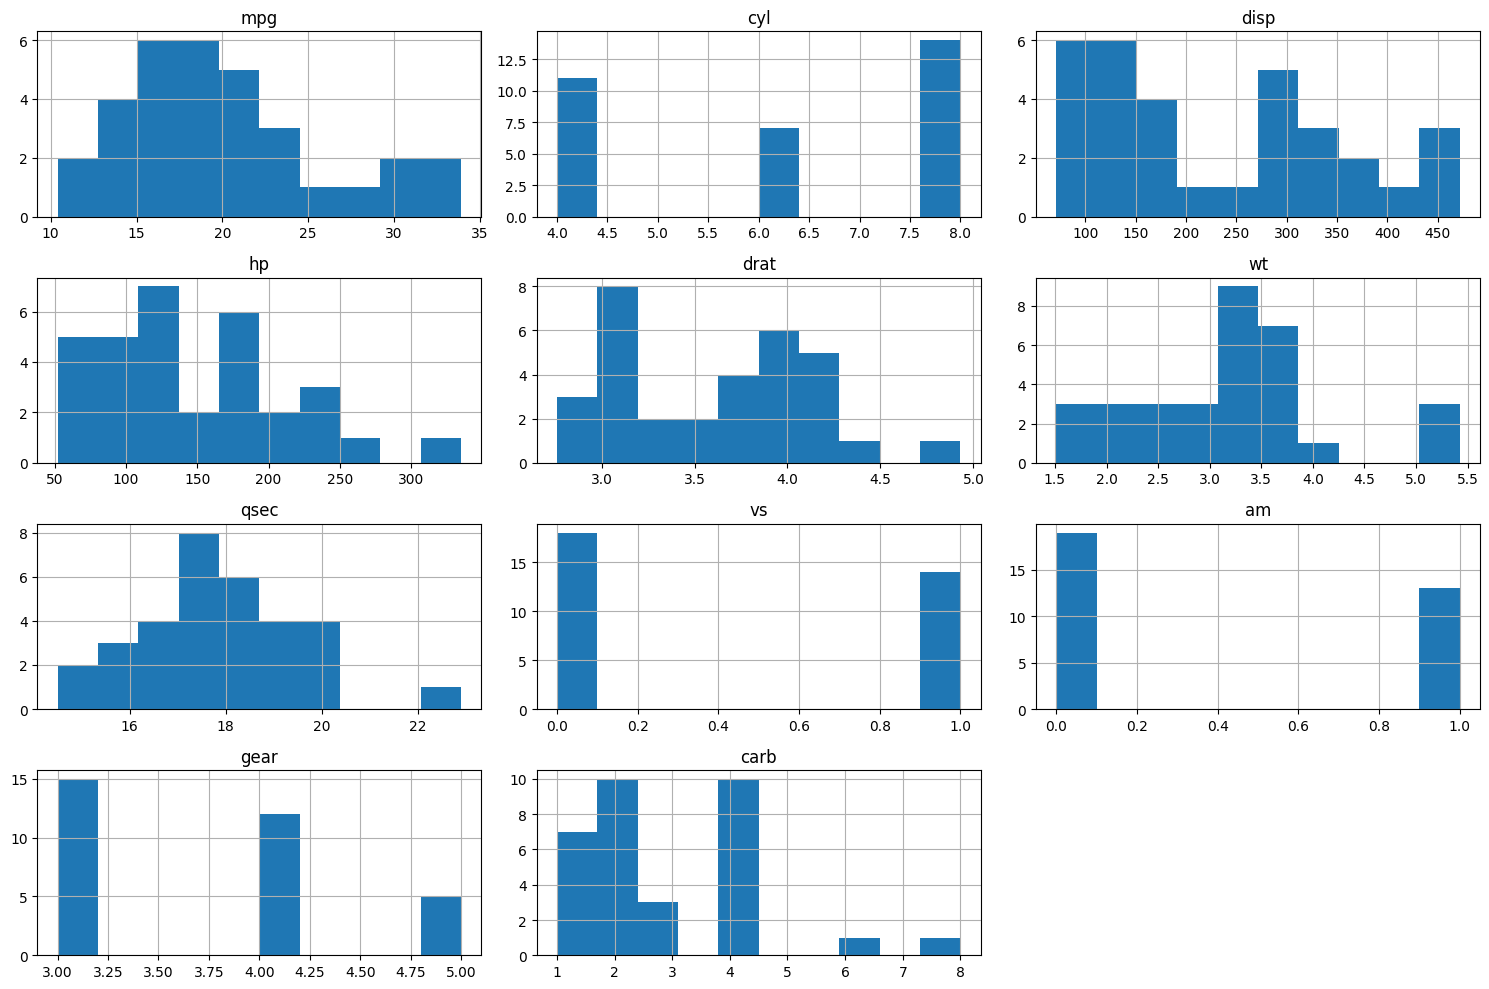

In [ ]:
# Plot histograms for all numerical variables
df.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Define independent (X) and dependent (y) variables
X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

In [ ]:
# Print the coefficients
print(model.params)

const    12.303374
cyl      -0.111440
disp      0.013335
hp       -0.021482
drat      0.787111
wt       -3.715304
qsec      0.821041
vs        0.317763
am        2.520227
gear      0.655413
carb     -0.199419
dtype: float64
